# Assignment 2 - Counting Bloom Filters

Part 1

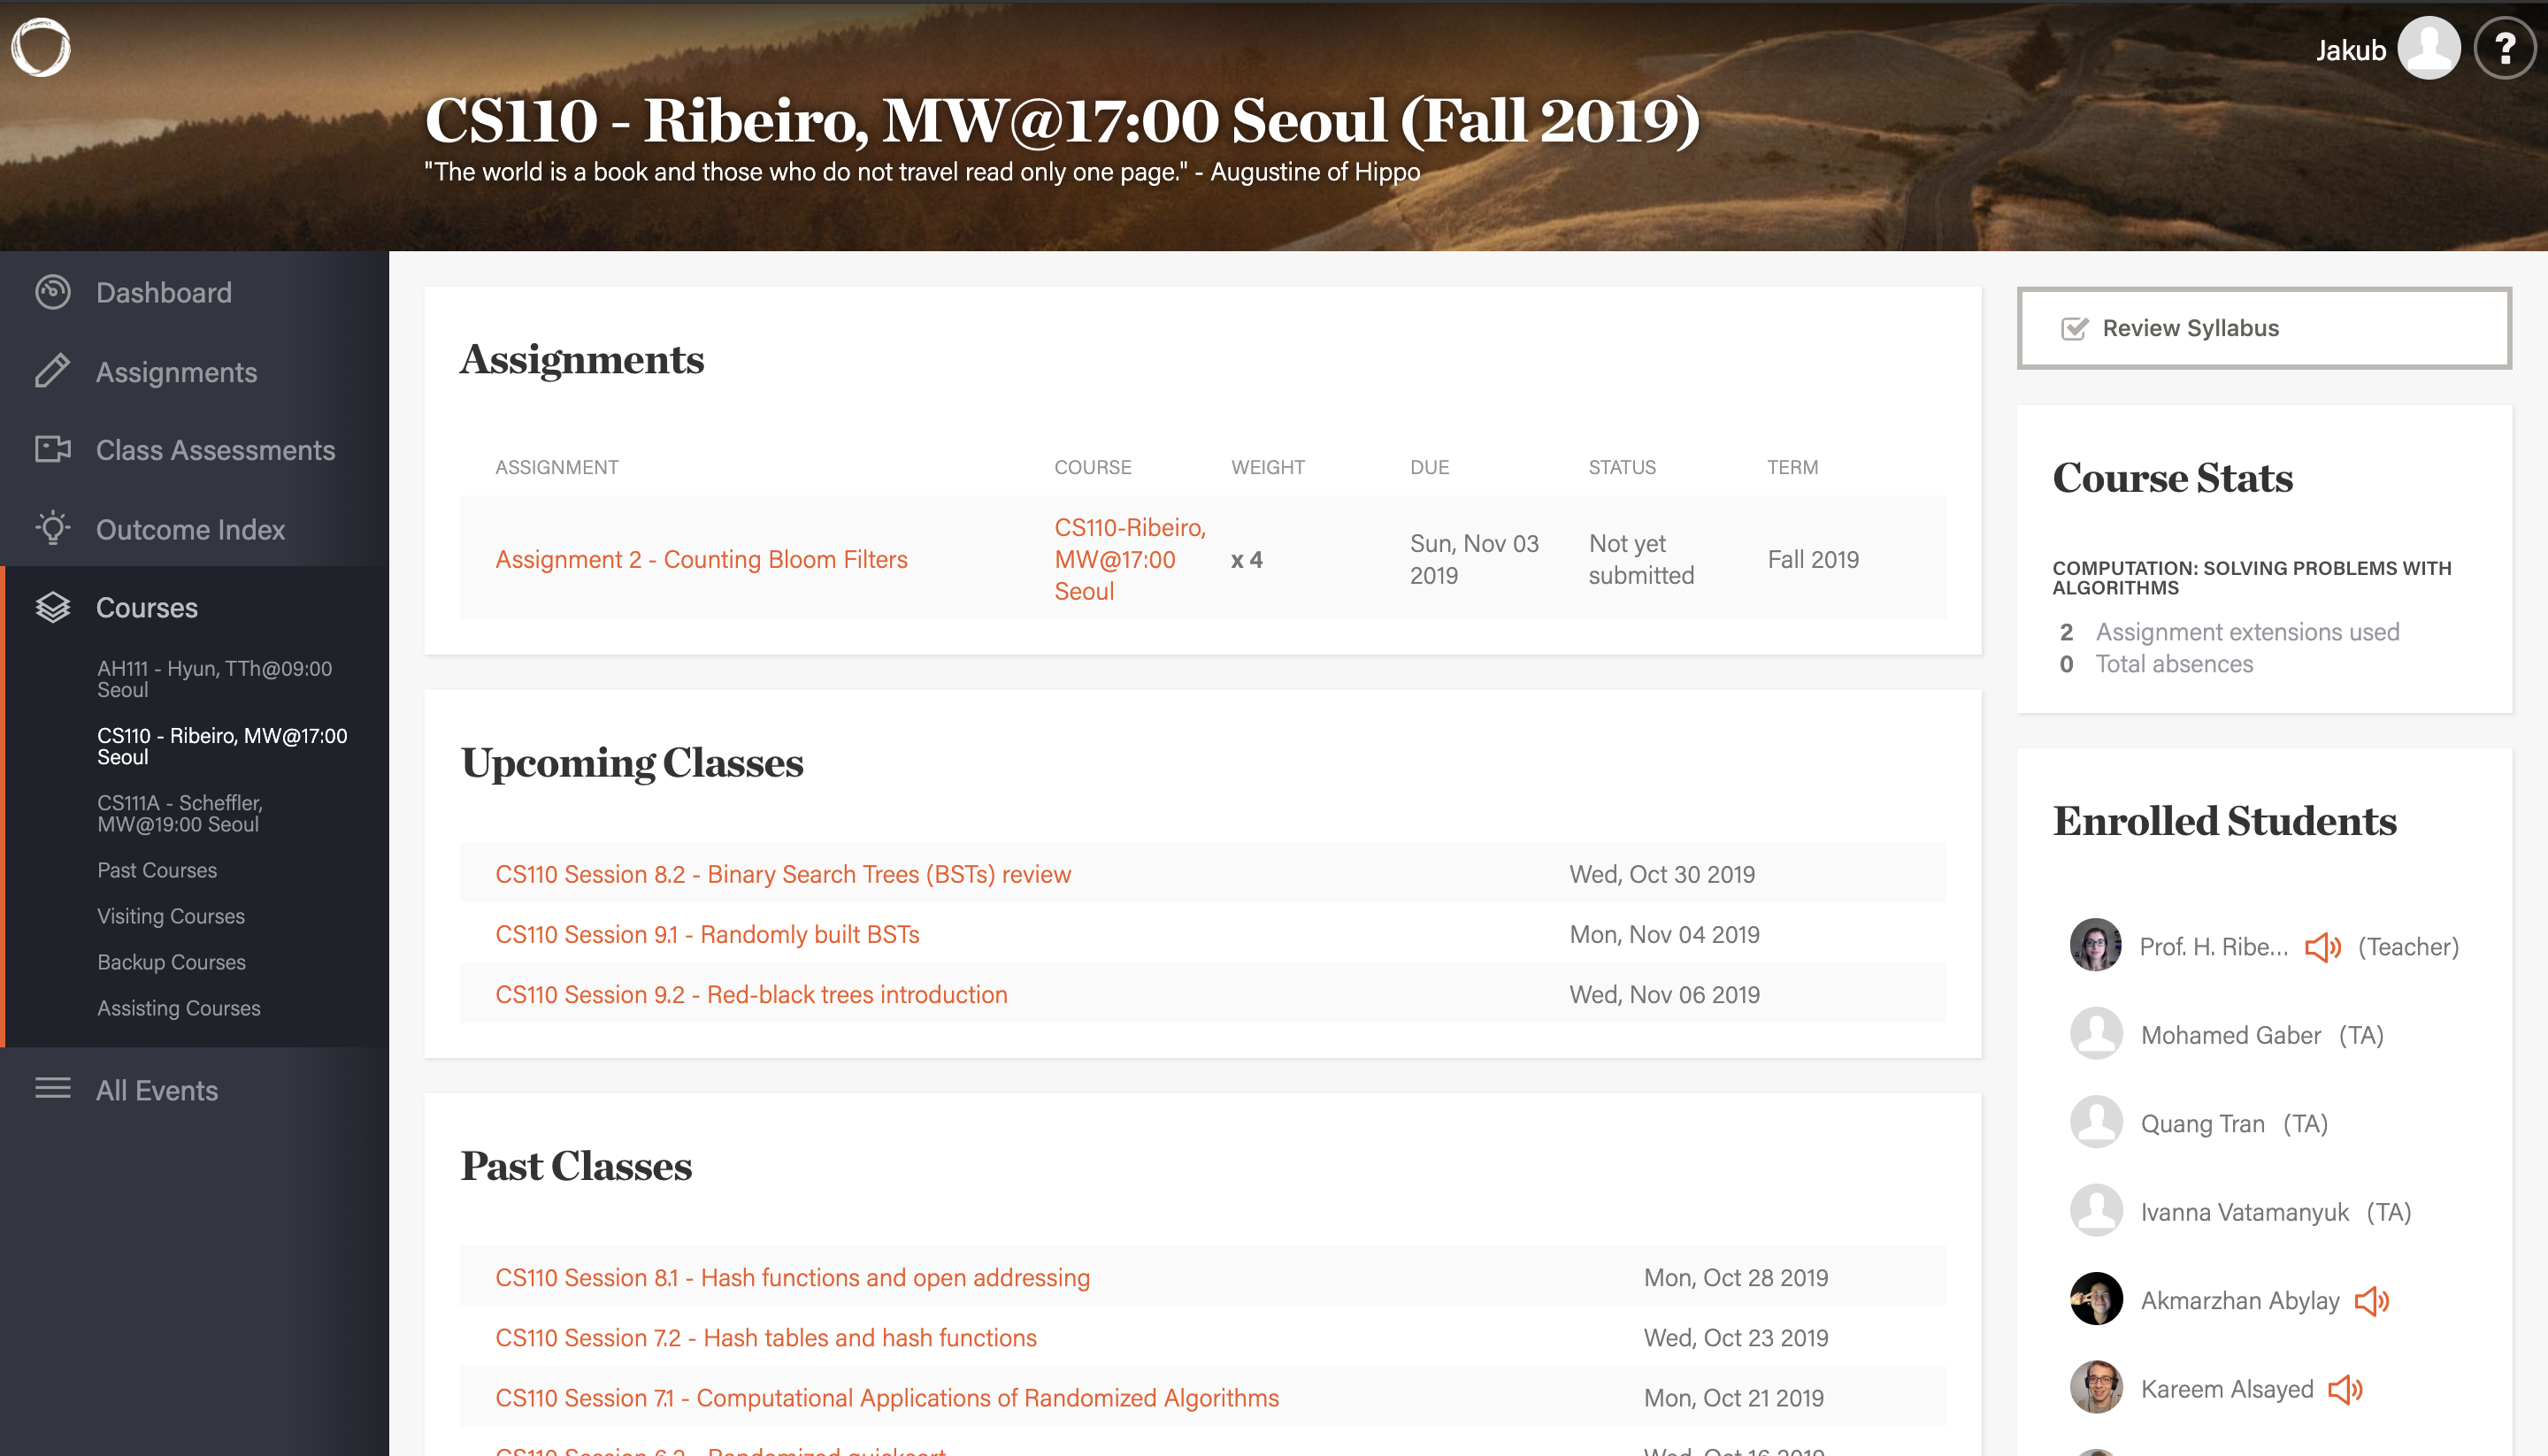

In [1]:
from IPython.display import Image
Image("CS110 Dashboard Screenshot.png")

-----

Part 3

The hash function used in bloom filters should be independent and uniformly distributed. Traditional cryptographic hash functions are too time-expensive and hence other methods are more favorable. Most commonly used hashing functions that satisfy the requiremennts of Bloom Filters include murmur, the fnv series of hashes, and HashMix. In this assignment, we will use murmur, which is imported by the mmh3 python library. An advantage of mmh3 is that we can instantiate multiple independent hash functions with different seeds. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import mmh3
import random
import math

In [4]:
class CBF(object):
    def __init__(self, m, k):
        #Initializing a class object with m - size of the bloom filter, and k - number of hash functions
        self.m = [0]*m
        self.length = m
        self.k = k
        
        #Adding a k number of hash functions to the list of hash_functions
        #We do it using lambda, which will enable calling the hash_functions function 
        #with any element and hash it k number of times
        self.hash_functions = [lambda element: mmh3.hash(element, number) for number in range(self.k)]
        
            
    def insert(self, element):
        #The element is fed in each hash function and the values at corresponding positions are incremented
        #The values that the hash function returns are taken to the modulo m, giving the positional argument
        for hashfunction in self.hash_functions:
            position = hashfunction(element)
            position = position % self.length
            self.m[position] += 1
            
    
    def query(self, element):
        #Feed the element into each hash function
        #Check the positional arguments at corresponding indices given by hash functions
        #If all the values are greater than 0, return True - meaning that the element is likely to be in the set
        #If at least one of the values = 0, return False - meaning that the element definitely is not in the set
        for hashfunction in self.hash_functions:
            position = hashfunction(element)
            position = position % self.length
            if self.m[position] == 0:
                return False
        return True
    
    
    def remove(self, element):
        #To remove the element, we have to ensure that it is in the set, hence we use the access function
        #If it is True we iterate over all hash functions and decrease the corresponding positional arguments by 1
        #We add the condition that the positional argument has to be more than 0 
        #since we don't want to have negative counters
        if self.query(element):
            for hashfunction in self.hash_functions:
                position = hashfunction(element)
                position = position % self.length
                if self.m[position]>0:
                    self.m[position]-=1

----

Part 4

In [6]:
#Creating a function that generates a random string.
#To make sure that all the elements that we generate with this function are distinct, 
#we will create strings of 20 characters, where the pool of characters is all letters from the alphabet
#Thus, the number of possible elements created by this function is 20^26
def create_random_element():
    string = ''
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    for i in range(20):
        #Using the random.choice, which takes a random item from a list and appending it to our string
        string += random.choice(alphabet)
    return string

In [14]:
#4 a).
#Having such a high number of possible strings (6.71^33), 
#we can assume that every element that we create for the purpose of this assignment will be distinct
def false_positive_rate(cbf):
    false_positives=0
    n=100
    #Populating the CBF with n number of elements
    for i in range(1,n+1):
        cbf.insert(create_random_element())
        
    #Checking if the newly inserted element gives a false positive. 
    #We can assume that if the cbf.query() function returns True, it is a false positive, 
    #given very high pool size of random strings generated by the create_random_elment() function
    for i in range(1, n+1):
        if cbf.query(create_random_element()):
            false_positives+=1
    #Returning the false-positive rate, which is the number of false positives divided by the number of inputs        
    return false_positives/n

k=10 #specifying our number of hash functions because it has to remain constant
m=range(1, 10001, 10) #creating 1000 different memory sizes in the interval of 10, between 1 and 10.000
counting_bloom_filters = [CBF(x, k) for x in m] #creating 1000 bloom filters 
#calling false_positive_rate on each bloom from the counting_bloom_filters list and storing the false-positive rate for each of them
false_positive_rates = [false_positive_rate(cbf) for cbf in counitng_bloom_filters] 

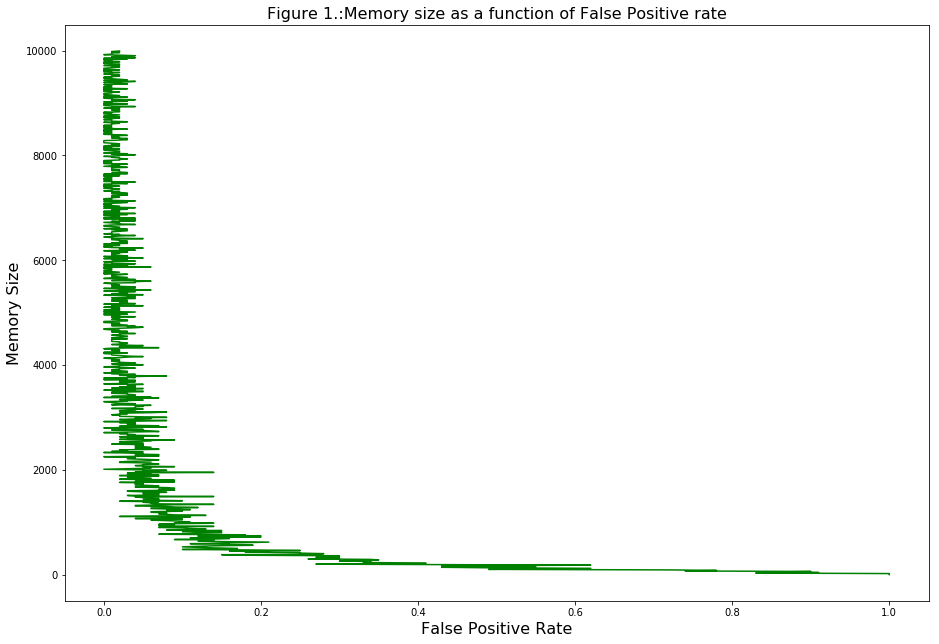

In [30]:
fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2]) #making it bigger for a better visibility
plt.plot(false_positive_rates,m,color='green') #adding data to x- and y-axis
pyplot.xlabel('False Positive Rate').set_fontsize(16) #setting labels and increaseing fontsizes
pyplot.ylabel('Memory Size').set_fontsize(16)
pyplot.title('Figure 1.:Memory size as a function of False Positive rate').set_fontsize(16)
pyplot.show()

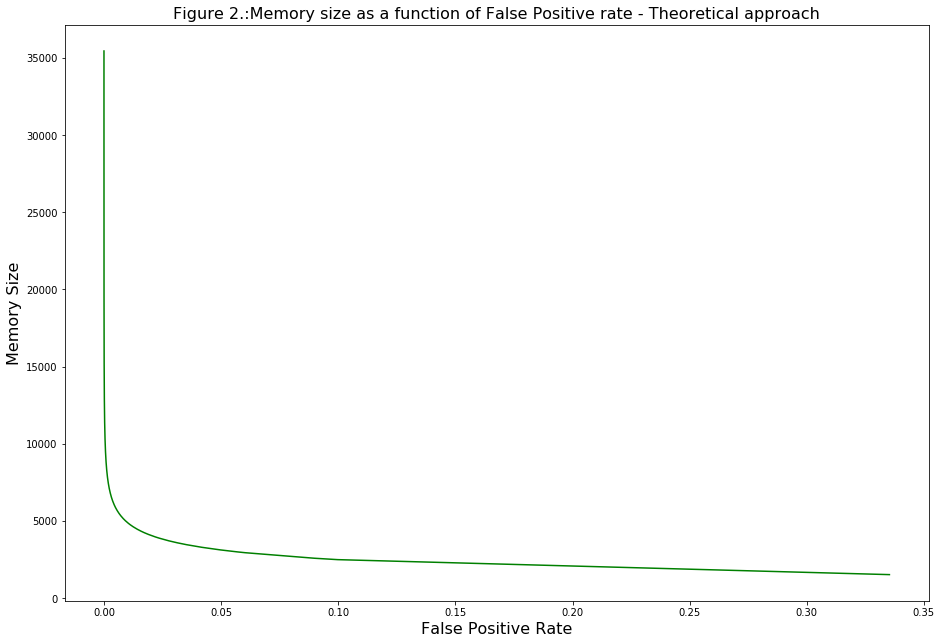

In [137]:
#The formula for false-positive rate as a function of memory size
theoretical_fpr=[(1 - (1 - (1/m))**(n*k))**k for m in m]
#Plotting the results
fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2]) #making it bigger for a better visibility
plt.plot(theoretical_fpr, m, color='g')
ax.set_xlabel('False Positive Rate').set_fontsize(16) #setting labels and increaseing fontsizes
ax.set_ylabel('Memory Size').set_fontsize(16)
ax.set_title('Figure 2.:Memory size as a function of False Positive rate - Theoretical approach').set_fontsize(16)
plt.show()

Text(0.5, 1.0, 'Figure 3.: Memory size as a function of the number of items stored')

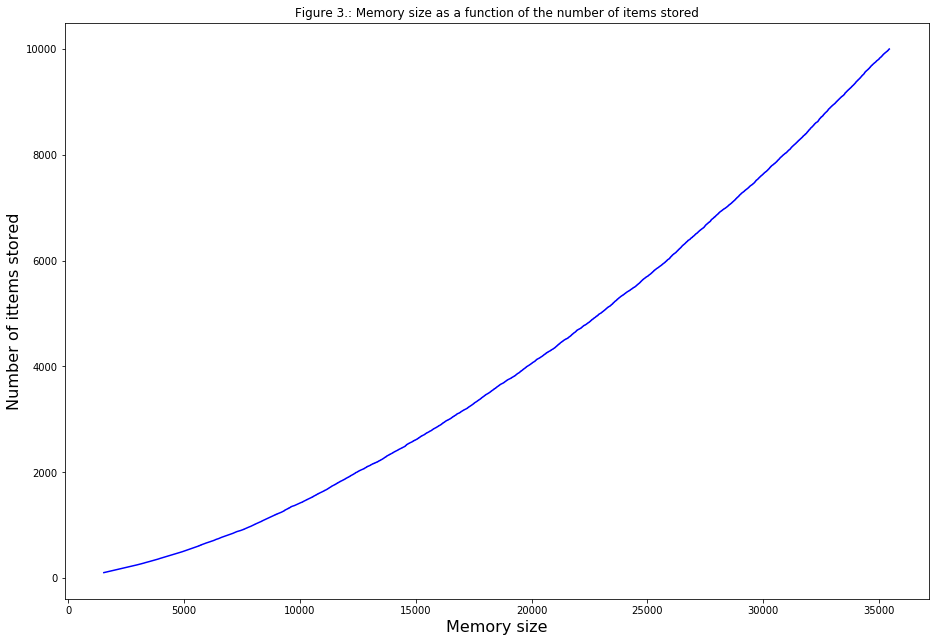

In [132]:
#4 b). 
k=5 #setting our number of hash functions as a constant
false_posiive_rate_max=0.02 #setting the maximum false positive
size=500 #initial memory size
cbf=CBF(size, k) #creating a Counting Bloom Filter
m=[] #where m will be stored
n=[] #where n will be stored
#running a loop where a new element is added to the CBF when its FPR is less than our max
#If FPR exceeds the maximum, the size of CBF is increased by 10
for i in range(10000):
    if false_positive_rate(cbf)<false_posiive_rate_max:
        m.append(size)
        n.append(i)
        cbf.insert(create_random_element())
    else:
        size+=10
        cbf=CBF(size, k)
    
fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2])

plt.plot(m, n, 'b')

ax.set_ylabel('Number of ittems stored').set_fontsize(16)
ax.set_xlabel('Memory size').set_fontsize(16)
ax.set_title("Figure 3.: Memory size as a function of the number of items stored")

Text(0.5, 1.0, 'Figure 4.: Access time as a function of the false-positive rate')

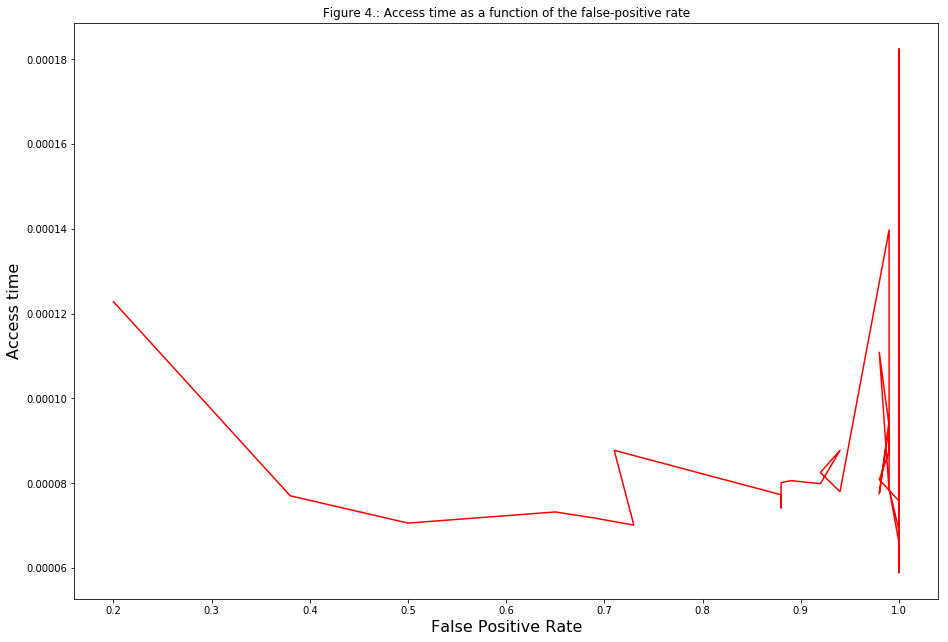

In [143]:
#4 c). 
Counting_Bloom_Filter=CBF(10000, 5)
elements=[create_random_element() for i in range(1000)] 
fpr=[]
fpr_avg=[]
durations=[]
for i in range(1000): 
    Counting_Bloom_Filter.insert(elements[i]) 
    duration=0
    for i in range(20):
        start=time.time()
        Counting_Bloom_Filter.query(random.choice(elements))
        end=time.time()
        duration+=end-start
        fpr.append(false_positive_rate(Counting_Bloom_Filter))
    durations.append(duration) 
    fpr_avg.append(np.mean(false_positive_rate(Counting_Bloom_Filter))) 
fig = plt.figure() #defining a figure 
ax = fig.add_axes([0,0,2,2])
plt.plot(fpr_avg, durations, 'r')
ax.set_ylabel('Access time').set_fontsize(16)
ax.set_xlabel('False Positive Rate').set_fontsize(16)
ax.set_title("Figure 4.: Access time as a function of the false-positive rate")

Text(0.5, 1.0, 'Figure 5.: Access time as a function of the number of items stored')

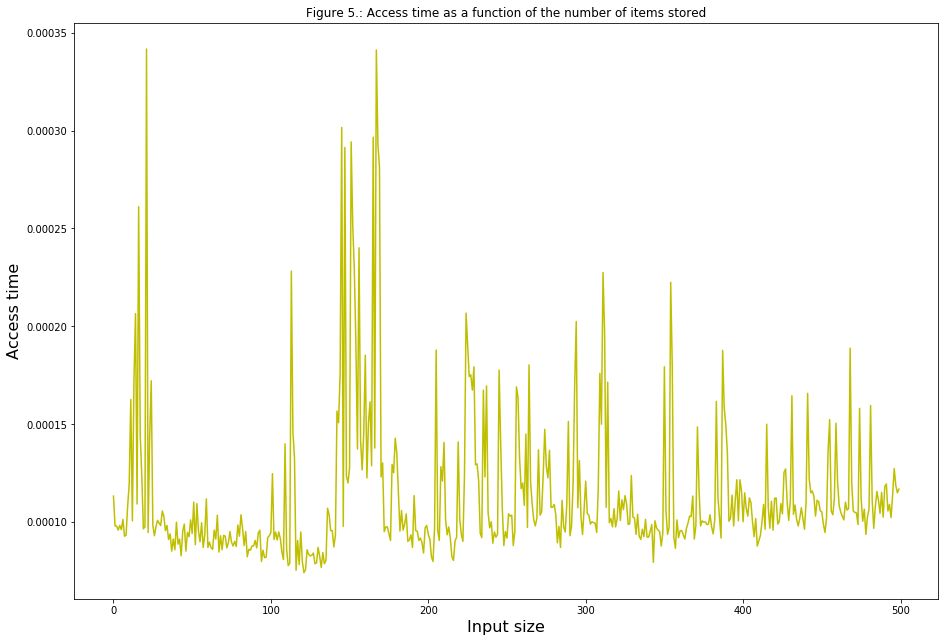

In [136]:
#4 d).
Counting_Bloom_Filter=CBF(50000, 5) #keeping the size of the bloom constant
elements=[create_random_element() for i in range(1000)]#inputting random elements
avg_access_times=[]
durations=[]
duration=0
#running a loop 500 times - checking querying time for 500 different input sizes
for i in range(500):
    #adding respective number of elements
    for n in range(i):
            Counting_Bloom_Filter.insert(elements[n])
    duration=0
    #checking an average querying time over 50 trials
    for i in range(50):
        start=time.time()
        Counting_Bloom_Filter.query(random.choice(elements))
        end=time.time()
        duration+=end-start
    durations.append(duration)

#plotting the results
fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2])

xvalues=[i for i in range(500)]

plt.plot(xvalues, durations, 'y')

ax.set_ylabel('Access time').set_fontsize(16)
ax.set_xlabel('Input size').set_fontsize(16)
ax.set_title("Figure 5.: Access time as a function of the number of items stored")
    

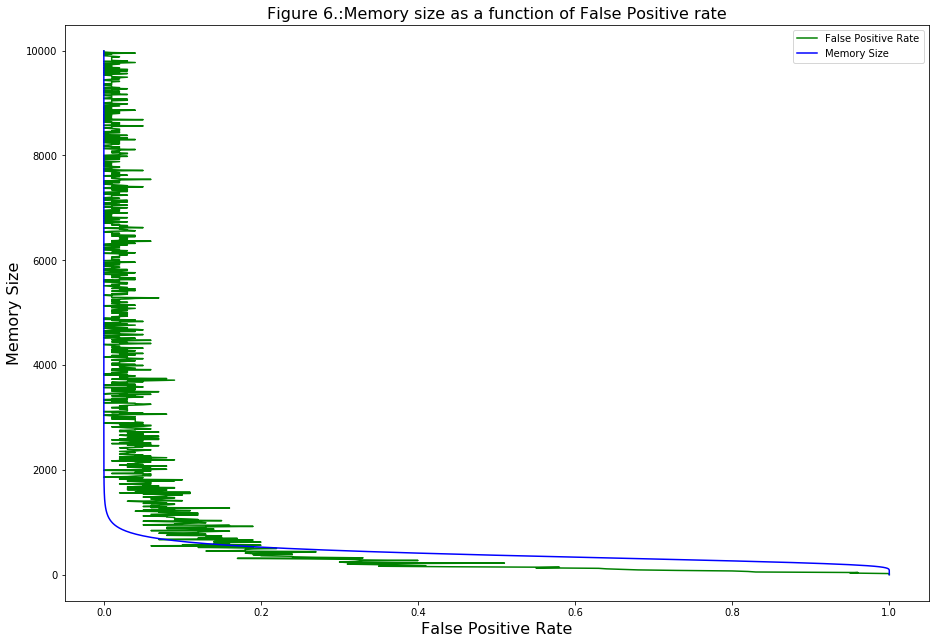

In [127]:
#5
k=10 #specifying our number of hash functions because it has to remain constant
n=100
m=range(1, 10001, 10) #creating 1000 different memory sizes in the interval of 10, between 1 and 10.000
counting_bloom_filters = [CBF(x, k) for x in m] #creating 1000 bloom filters 
#calling false_positive_rate on each bloom from the counting_bloom_filters list and storing the false-positive rate for each of them
false_positive_rates = [false_positive_rate(cbf) for cbf in counting_bloom_filters] 

#The formula for false-positive rate as a function of memory size
theoretical_fpr=[(1 - (1 - (1/m))**(n*k))**k for m in m]

#Plotting the results
fig = plt.figure() #defining a figure
ax = fig.add_axes([0,0,2,2]) #making it bigger for a better visibility
plt.plot(false_positive_rates,m,color='green') #adding data to x- and y-axis
plt.plot(theoretical_fpr, m, color='b')
ax.set_xlabel('False Positive Rate').set_fontsize(16) #setting labels and increaseing fontsizes
ax.set_ylabel('Memory Size').set_fontsize(16)
ax.set_title('Figure 6.:Memory size as a function of False Positive rate').set_fontsize(16)
ax.legend(('Experimental FPR', 'Theoretical FPR'))
plt.show()